In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
#read the csv file
credit_card_data = pd.read_csv('creditcard.csv')

#print first file rows
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#checking shape of the dataset
credit_card_data.shape

(284807, 31)

In [4]:
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No null value

In [5]:
#checking statistics 
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


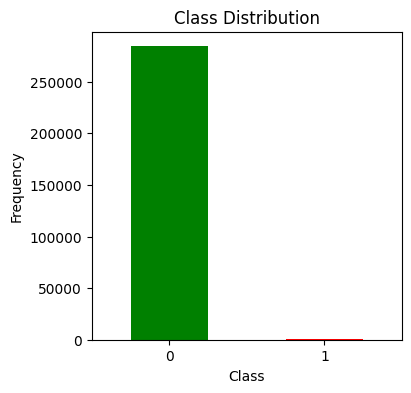

In [6]:
#checking distribution of th data
class_distrib = credit_card_data["Class"].value_counts()

# Plot the distribution
plt.figure(figsize=(4, 4))
class_distrib.plot(kind='bar',color=['green','red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [7]:
#checking the number of instance of class 1 - means fraud  0 - means not fraud
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Highly imbalance dataset

In [8]:
#check nature of the dataset
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Lets check time is relevent feature or not


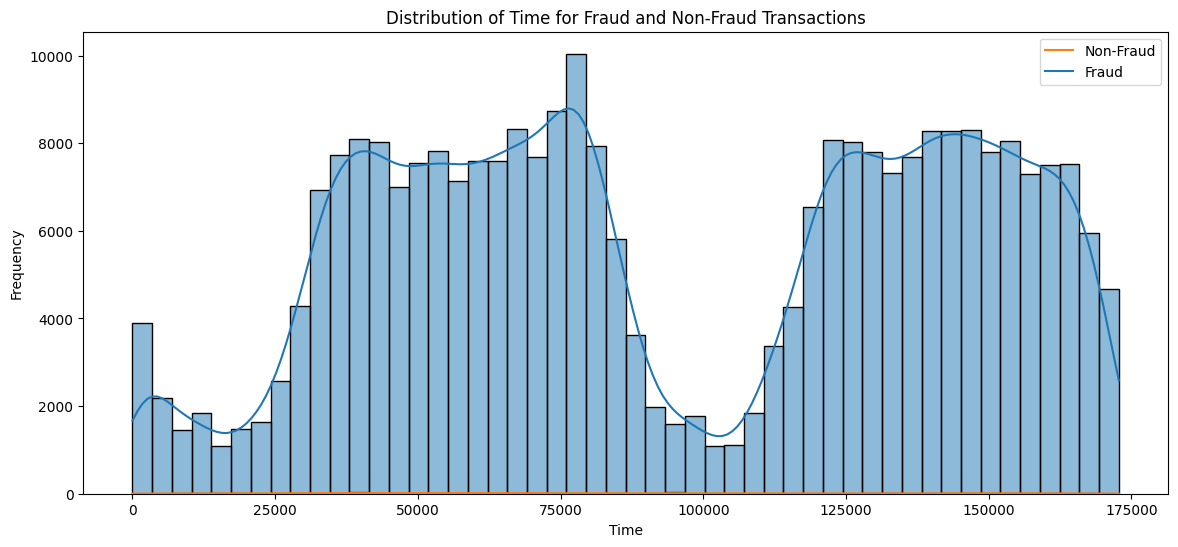

In [9]:

plt.figure(figsize=(14, 6))
sns.histplot(data=credit_card_data, x='Time', hue='Class', bins=50, kde=True)
plt.title('Distribution of Time for Fraud and Non-Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()


As there no clear discrimination between legit and fraud transaction .SO Time will not be relevent feature
I think droping time column would be better

In [10]:
#droping time column 
credit_card_data = credit_card_data.drop('Time',axis =1)
print('Time column has dropped sucessfully ......')

Time column has dropped sucessfully ......


In [11]:
#check time colomn has dropped or not
credit_card_data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [12]:

#removing duplicates
credit_card_data =credit_card_data.drop_duplicates()

In [13]:
credit_card_data.duplicated().sum()

0

As we saw previously the data is highly imbalanced .we will try two different method to handle thi suituation 
1. downsampling 
2. upsampling 

'=======================DOWNSAMPLING============================'

In [14]:
#performing down sampling
legit_trans = credit_card_data[credit_card_data.Class == 0]

fraud_trans = credit_card_data[credit_card_data.Class == 1]

In [15]:
#lets check the shape
legit_trans.shape, fraud_trans.shape

((275190, 30), (473, 30))

We choose randomly only 473 data points from legit_trans

In [16]:
#lets choose randomly legit transaction
legit_sample = legit_trans.sample(n=473)

In [17]:
#making a new dataframe
balanced_data = pd.concat([legit_sample, fraud_trans], axis=0)

In [18]:
balanced_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
195146,2.111651,0.053529,-2.183273,-0.118724,0.602418,-1.338226,0.683558,-0.435417,0.022465,0.202451,...,0.174550,0.601755,-0.089330,-0.286795,0.438553,0.241963,-0.092664,-0.092999,3.70,0
248562,0.020306,0.776724,-0.561223,-0.359888,1.324108,-1.053648,1.232203,-0.700439,0.643696,-0.073481,...,0.120214,0.854246,-0.375264,-0.738180,-0.343110,-0.176252,-0.199648,-0.242346,13.32,0
249079,1.989107,-0.204449,-0.673831,0.463798,-0.387130,-0.846579,-0.110046,-0.143889,1.108186,-0.175513,...,-0.468370,-1.235939,0.476496,-0.171466,-0.478959,-0.834489,0.012734,-0.037144,12.99,0
211982,2.015938,-0.279316,-1.786819,-0.249729,0.424673,-0.400821,0.102634,-0.121675,0.662042,-0.011265,...,0.281841,0.819734,-0.086365,0.210703,0.360246,-0.375148,-0.020155,-0.059766,37.83,0
62555,-0.168804,0.095875,1.704596,-1.416061,-0.484605,-0.077652,-0.240118,0.196115,-1.507279,0.319087,...,0.254661,0.621554,-0.111825,0.031814,-0.173298,-0.310467,0.056188,0.012865,1.00,0


In [19]:
#lets check does it have same nature as it was or its nature has changes
balanced_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.00665,-0.054703,0.125515,-0.124272,0.060115,0.026633,-0.031408,-0.029600,-0.030671,0.025430,...,0.009069,0.035979,0.030148,-0.036723,0.007454,0.002361,-0.018002,-0.013037,0.000229,86.794376
1,-4.49828,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Dataset has almost same nature 

In [20]:
#splitting the data into X and y
X = balanced_data.drop(columns='Class', axis=1)
y = balanced_data['Class']

In [21]:
#spllting the data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
#initilizing Logiticregression model and fitting the data
model_logistic_ds = LogisticRegression(max_iter=1000)  # You can increase the max_iter value as needed

#fit the data
model_logistic_ds.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
def evaluate_model(model, X_data, y_data):
    # Make predictions
    y_pred = model.predict(X_data)

    # Calculate metrics
    accuracy = accuracy_score(y_data, y_pred)
    precision = precision_score(y_data, y_pred)
    recall = recall_score(y_data, y_pred)
    f1 = f1_score(y_data, y_pred)
    
    # Print metrics
    print('Accuracy on model is  : ', accuracy)
    print('Precision on model is : ', precision)
    print('Recall on model is : ', recall)
    print('F1 on model is : ', f1)

    # Compute confusion matrix
    cm = confusion_matrix(y_data, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


Accuracy on model is  :  0.9537037037037037
Precision on model is :  0.9803921568627451
Recall on model is :  0.9259259259259259
F1 on model is :  0.9523809523809523


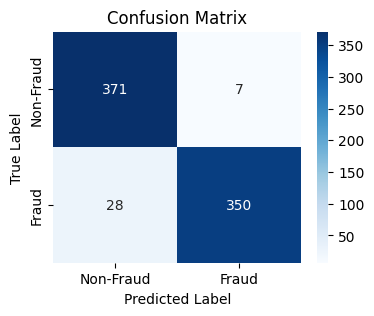

In [24]:
#lets check training Performance
evaluate_model(model_logistic_ds,X_train,y_train)

Accuracy on model is  :  0.9526315789473684
Precision on model is :  0.9886363636363636
Recall on model is :  0.9157894736842105
F1 on model is :  0.9508196721311475


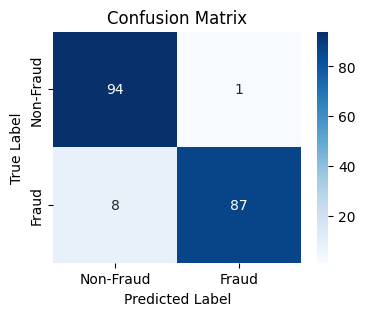

In [53]:
#Performance on unseen Data
evaluate_model(model_logistic_ds,X_test,y_test)

Lets train RandomForest model

In [29]:
#lets check how randomforest will perform
model_randomforest = RandomForestClassifier()

#fit the data
model_randomforest.fit(X_train, y_train)


RandomForestClassifier()

Accuracy on model is  :  1.0
Precision on model is :  1.0
Recall on model is :  1.0
F1 on model is :  1.0


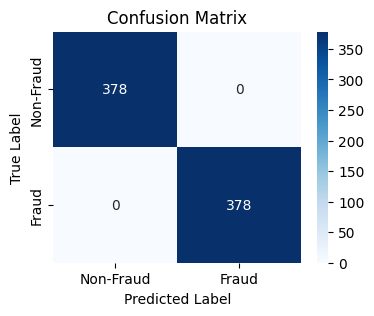

In [30]:
#Performance on train Data
evaluate_model(model_randomforest,X_train,y_train)

Accuracy on model is  :  0.9473684210526315
Precision on model is :  0.9885057471264368
Recall on model is :  0.9052631578947369
F1 on model is :  0.945054945054945


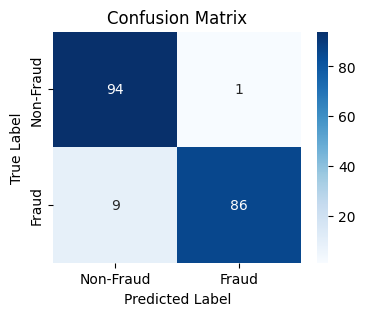

In [31]:
#Performance on unseen Data
evaluate_model(model_randomforest,X_test,y_test)

UPSAMPLING using SMOTE

In [34]:
#performing oversampling
#splittinh the data into X and y
X = credit_card_data.drop(columns='Class', axis=1)
y = credit_card_data['Class']

In [35]:
#using SMOTE for over sampling
from imblearn.over_sampling import SMOTE

#initialzie smote 
smote = SMOTE()

#it will return upsampled sata
X_resampled, y_resampled = smote.fit_resample(X,y)

In [36]:
y_resampled.shape,X_resampled.shape

((550380,), (550380, 29))

In [37]:
#spllting the data into train test
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [39]:
#lets train logistic model
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy on model is  :  0.952298866237872
Precision on model is :  0.9617667241603145
Recall on model is :  0.9420628829131602
F1 on model is :  0.9518128402732051


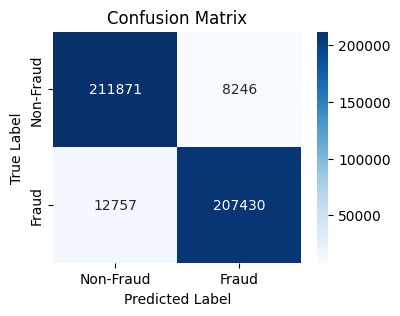

In [40]:
#Evaluate the model after using smote 
#train performance
evaluate_model(model_log,X_train_smote,y_train_smote)

Accuracy on model is  :  0.9521966641229695
Precision on model is :  0.9615306103512906
Recall on model is :  0.9420213442903115
F1 on model is :  0.9516760033060887


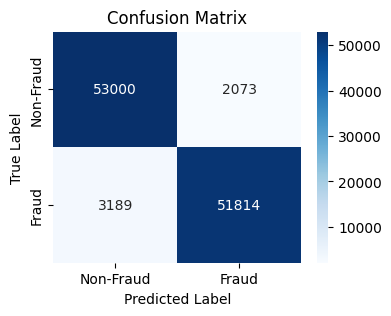

In [41]:
#Test performance
evaluate_model(model_log,X_test_smote,y_test_smote)

RANDOMFOREST

In [42]:
#lets see randomforest
model_randomfor = RandomForestClassifier()
model_randomfor.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

Accuracy on model is  :  1.0
Precision on model is :  1.0
Recall on model is :  1.0
F1 on model is :  1.0


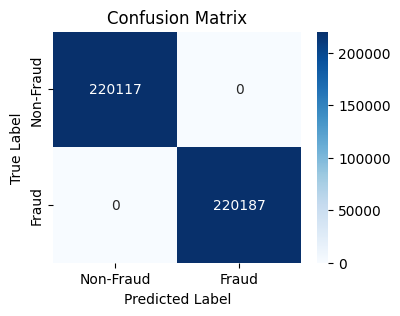

In [44]:
#evaluate performance on train 
evaluate_model(model_randomfor,X_train_smote,y_train_smote)

Accuracy on model is  :  0.9999000690432065
Precision on model is :  0.9998000508961356
Recall on model is :  1.0
F1 on model is :  0.9999000154521573


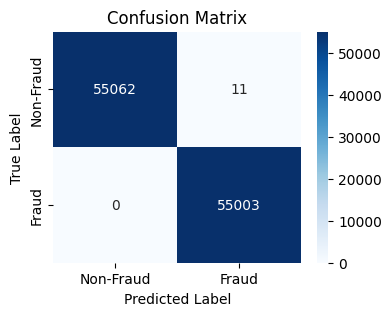

In [45]:
#checking how it performs on test data
evaluate_model(model_randomfor,X_test_smote,y_test_smote)

woohooo !!!!! we got our best model model sucessfully classfied all the fraud , recall -1 

RandomForest perfrom very very well so will save this model for further use 

In [46]:
import pickle

# Assuming 'model' is your trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_randomfor, file)


Lets load the model and do some predictions 

In [62]:
import pickle

# Load the model
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [122]:
# Define the prediction function
def predict(input_data):

    # Convert input data to a NumPy array if it is a list
    if isinstance(input_data, list):
        input_data = np.array(input_data)
    
    # Check if input_data is a 2D array
    if input_data.ndim == 1:
        input_data = input_data.reshape(1, -1)
    
    # Define column names
    columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
               'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
               'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
    
    # Convert input data to a DataFrame with appropriate column names
    input_data = pd.DataFrame(input_data, columns=columns)
    
    # Drop the 'Time' column
    input_data = input_data.drop(columns=['Time'])
    
    # Predict
    predictions = model.predict(input_data)
    

    if predictions == 0 : return 'Legit Transaction !'
    else :return 'Fraud Transaction'



In [123]:
#gives fraud data  with label 1
data=credit_card_data[credit_card_data.Class==1].iloc[0]
print(data)

V1       -2.312227
V2        1.951992
V3       -1.609851
V4        3.997906
V5       -0.522188
V6       -1.426545
V7       -2.537387
V8        1.391657
V9       -2.770089
V10      -2.772272
V11       3.202033
V12      -2.899907
V13      -0.595222
V14      -4.289254
V15       0.389724
V16      -1.140747
V17      -2.830056
V18      -0.016822
V19       0.416956
V20       0.126911
V21       0.517232
V22      -0.035049
V23      -0.465211
V24       0.320198
V25       0.044519
V26       0.177840
V27       0.261145
V28      -0.143276
Amount    0.000000
Class     1.000000
Name: 541, dtype: float64


In [124]:
#converting the data into list
data=data.to_list()

In [125]:
#removing last column beacause its class
data=data[:-1]

In [126]:
#i added a number in the beginning becase data also need time column 
data.insert(0,2.00000)

In [127]:
#moment of truth 
data
new_data = data
predictions = predict(new_data)
print(predictions)

Fraud Transaction
